## Instalar dependências

In [1]:
!pip install -qq diffusers;
!pip install -qq -U peft;

## Treinar e ajustar o modelo

In [2]:
import torch
from diffusers import DiffusionPipeline, DDIMScheduler
from huggingface_hub import hf_hub_download

base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
repo_name = "ByteDance/Hyper-SD"

# Take 2-steps lora as an example
ckpt_name = "Hyper-SDXL-2steps-lora.safetensors"

# Load model.
pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe.load_lora_weights(hf_hub_download(repo_name, ckpt_name))
pipe.fuse_lora()
# Ensure ddim scheduler timestep spacing set as trailing !!!
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

2024-04-28 00:29:23.686443: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 00:29:23.686503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 00:29:23.687975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Resultado

  0%|          | 0/2 [00:00<?, ?it/s]

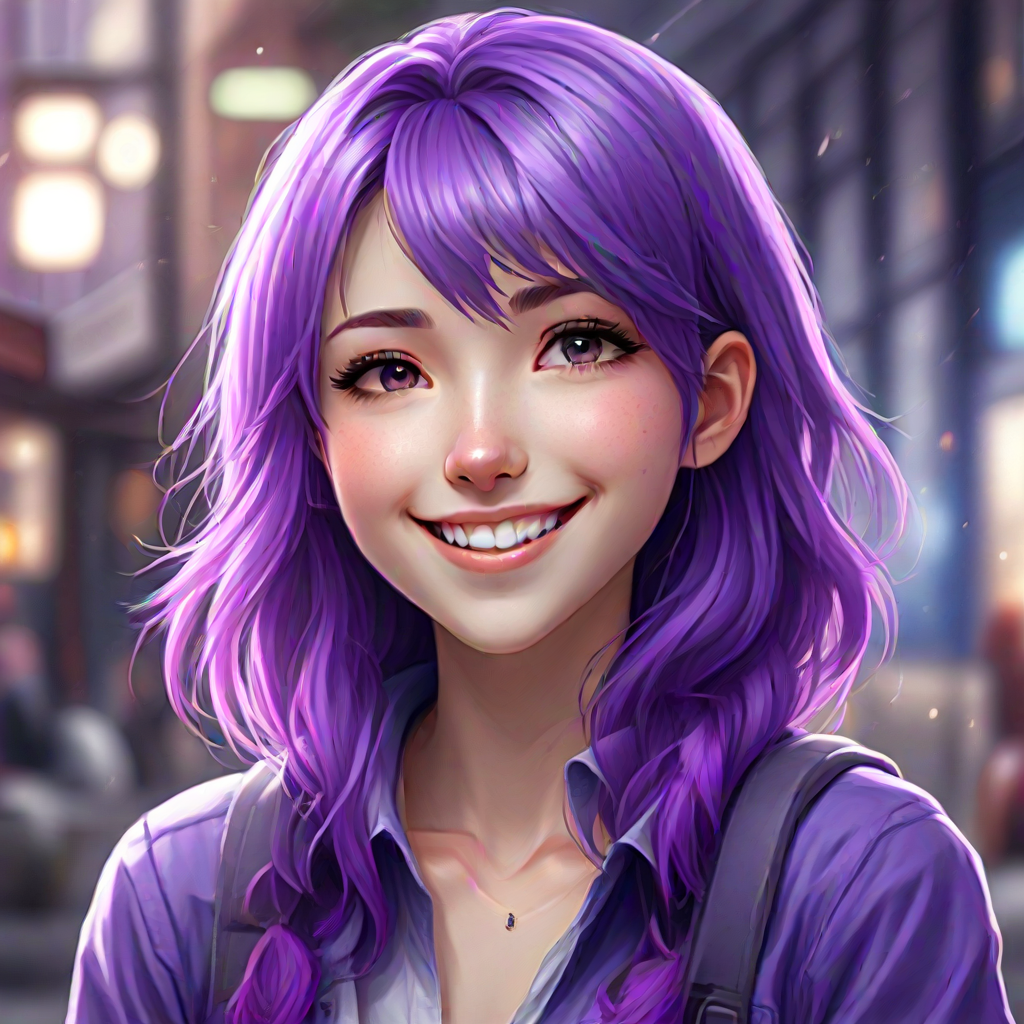

In [3]:
# lower eta results in more detail
prompt="An ultra-realistic photo of anime woman, purple hair, smiling"
image=pipe(prompt=prompt, num_inference_steps=2, guidance_scale=0).images[0]
image